In [31]:
# Importação das principais bibliotecas
import numpy as np
import pandas as pd

# Faz com que os gráficos gerados pelo Matplotlib sejam exibidos diretamente no próprio notebook, logo abaixo da célula onde o código que gera o gráfico é executado.
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhorar os gráficos
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')

np.random.seed(42)

<p>Como esse algoritmo não aprende padrões, <b>mas sim armazena os dados e calcula distâncias no momento da predição</b>, a escolha dos dados disponíveis é crucial. Se o conjunto de treino for muito pequeno ou não representativo, o modelo pode ter dificuldade para generalizar corretamente.</p>

# Como escolher o valor de k no k-NN?

A escolha do valor de \( k \) no **k-Nearest Neighbors (k-NN)** é crucial para o desempenho do modelo. Alguns métodos para definir \( k \) são:

##  1. Regra geral: escolha de \( k \)
- **Valores pequenos de \( k \)** (ex: \( k = 1, 3, 5 \)):  
  - Modelo mais **sensível ao ruído**.  
  - Tende a ter **alta variância** (overfitting).  
- **Valores grandes de \( k \)** (ex: \( k = 15, 20, 50 \)):  
  - Modelo mais **suavizado**, menos sensível a outliers.  
  - Pode levar a **underfitting** (perde detalhes da estrutura dos dados).  

**Regra prática**: Começar com um valor de \( k \) em torno de √N, onde \( N \) é o número total de exemplos no conjunto de treino.  


##  2. Escolha de \( k \) por validação cruzada
Uma forma objetiva de escolher \( k \) é testar diferentes valores e verificar o desempenho em um conjunto de validação.

### **Passos:**
1. Divida os dados em treino e validação.
2. Teste vários valores de \( k \) (ex: 1, 3, 5, 7, ..., 50).
3. Meça a métrica de desempenho (ex: AUC ROC/PR para classificação, RMSE para regressão).
4. Escolha o \( k \) que minimiza o erro ou maximiza a acurácia.

No Python, é possível fazer isso com o GridSearchCV

## 3. Definição de Raio para Seleção de Vizinhos 

### Algoritmos Disponíveis
- **RadiusNeighborsClassifier**: Utilizado para classificação.
- **RadiusNeighborsRegressor**: Utilizado para regressão.

### Parâmetros Importantes
- **radius**: Define o raio máximo dentro do qual os vizinhos serão considerados.
- **weights**: Permite ajustar o peso dos vizinhos (por exemplo, usando a distância inversa).
- **metric**: Define a métrica de distância (padrão: 'minkowski').




# Variáveis do meu case de diabetes

Diversas restrições foram aplicadas na seleção dessas instâncias a partir de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade e de ascendência indígena Pima.

## Descrição das Variáveis

- **Pregnancies**: Número de vezes que a paciente esteve grávida.
- **Glucose**: Concentração de glicose plasmática após 2 horas em um teste oral de tolerância à glicose.
- **BloodPressure**: Pressão arterial diastólica (mm Hg).
- **SkinThickness**: Espessura da dobra cutânea do tríceps (mm).
- **Insulin**: Nível de insulina sérica após 2 horas (mu U/ml).
- **BMI**: Índice de massa corporal (peso em kg / altura em m²).
- **DiabetesPedigreeFunction**: Função de pedigree para diabetes.
- **Age**: Idade (em anos).
- **Outcome**: Variável de classe (0 ou 1), indicando se o paciente possui diabetes ou não.


In [67]:
# Meu case de uso será prever se alguém está ou não com diabetes

df = pd.read_csv('diabetes.csv')

df_features = df.drop(columns = ['Outcome']).columns
df_y = pd.DataFrame(df['Outcome'], columns = ['Outcome'])

In [68]:
df_y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [69]:
from sklearn.preprocessing import StandardScaler

#Padronizando os dados
scaler = StandardScaler()
scaledf = scaler.fit_transform(df.drop(columns = 'Outcome'))

df = pd.DataFrame(scaledf, columns = df_features)

In [70]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [71]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [72]:
# Entender se os dados estão bem distribuidos entre as target
df_y.groupby(df_y['Outcome']).count()

""
Outcome
0
1


In [75]:
df_y.loc[df_y['Outcome'] == 1].count()/df_y.count()

# 34% dos dados estão na classe 1, se trata de um dataset desbalanceado. Dependendo do resultado das minhas métricas,
# Terei que mexer nos meus dados, alterando seus pesos para o modelo

Outcome    0.348958
dtype: float64

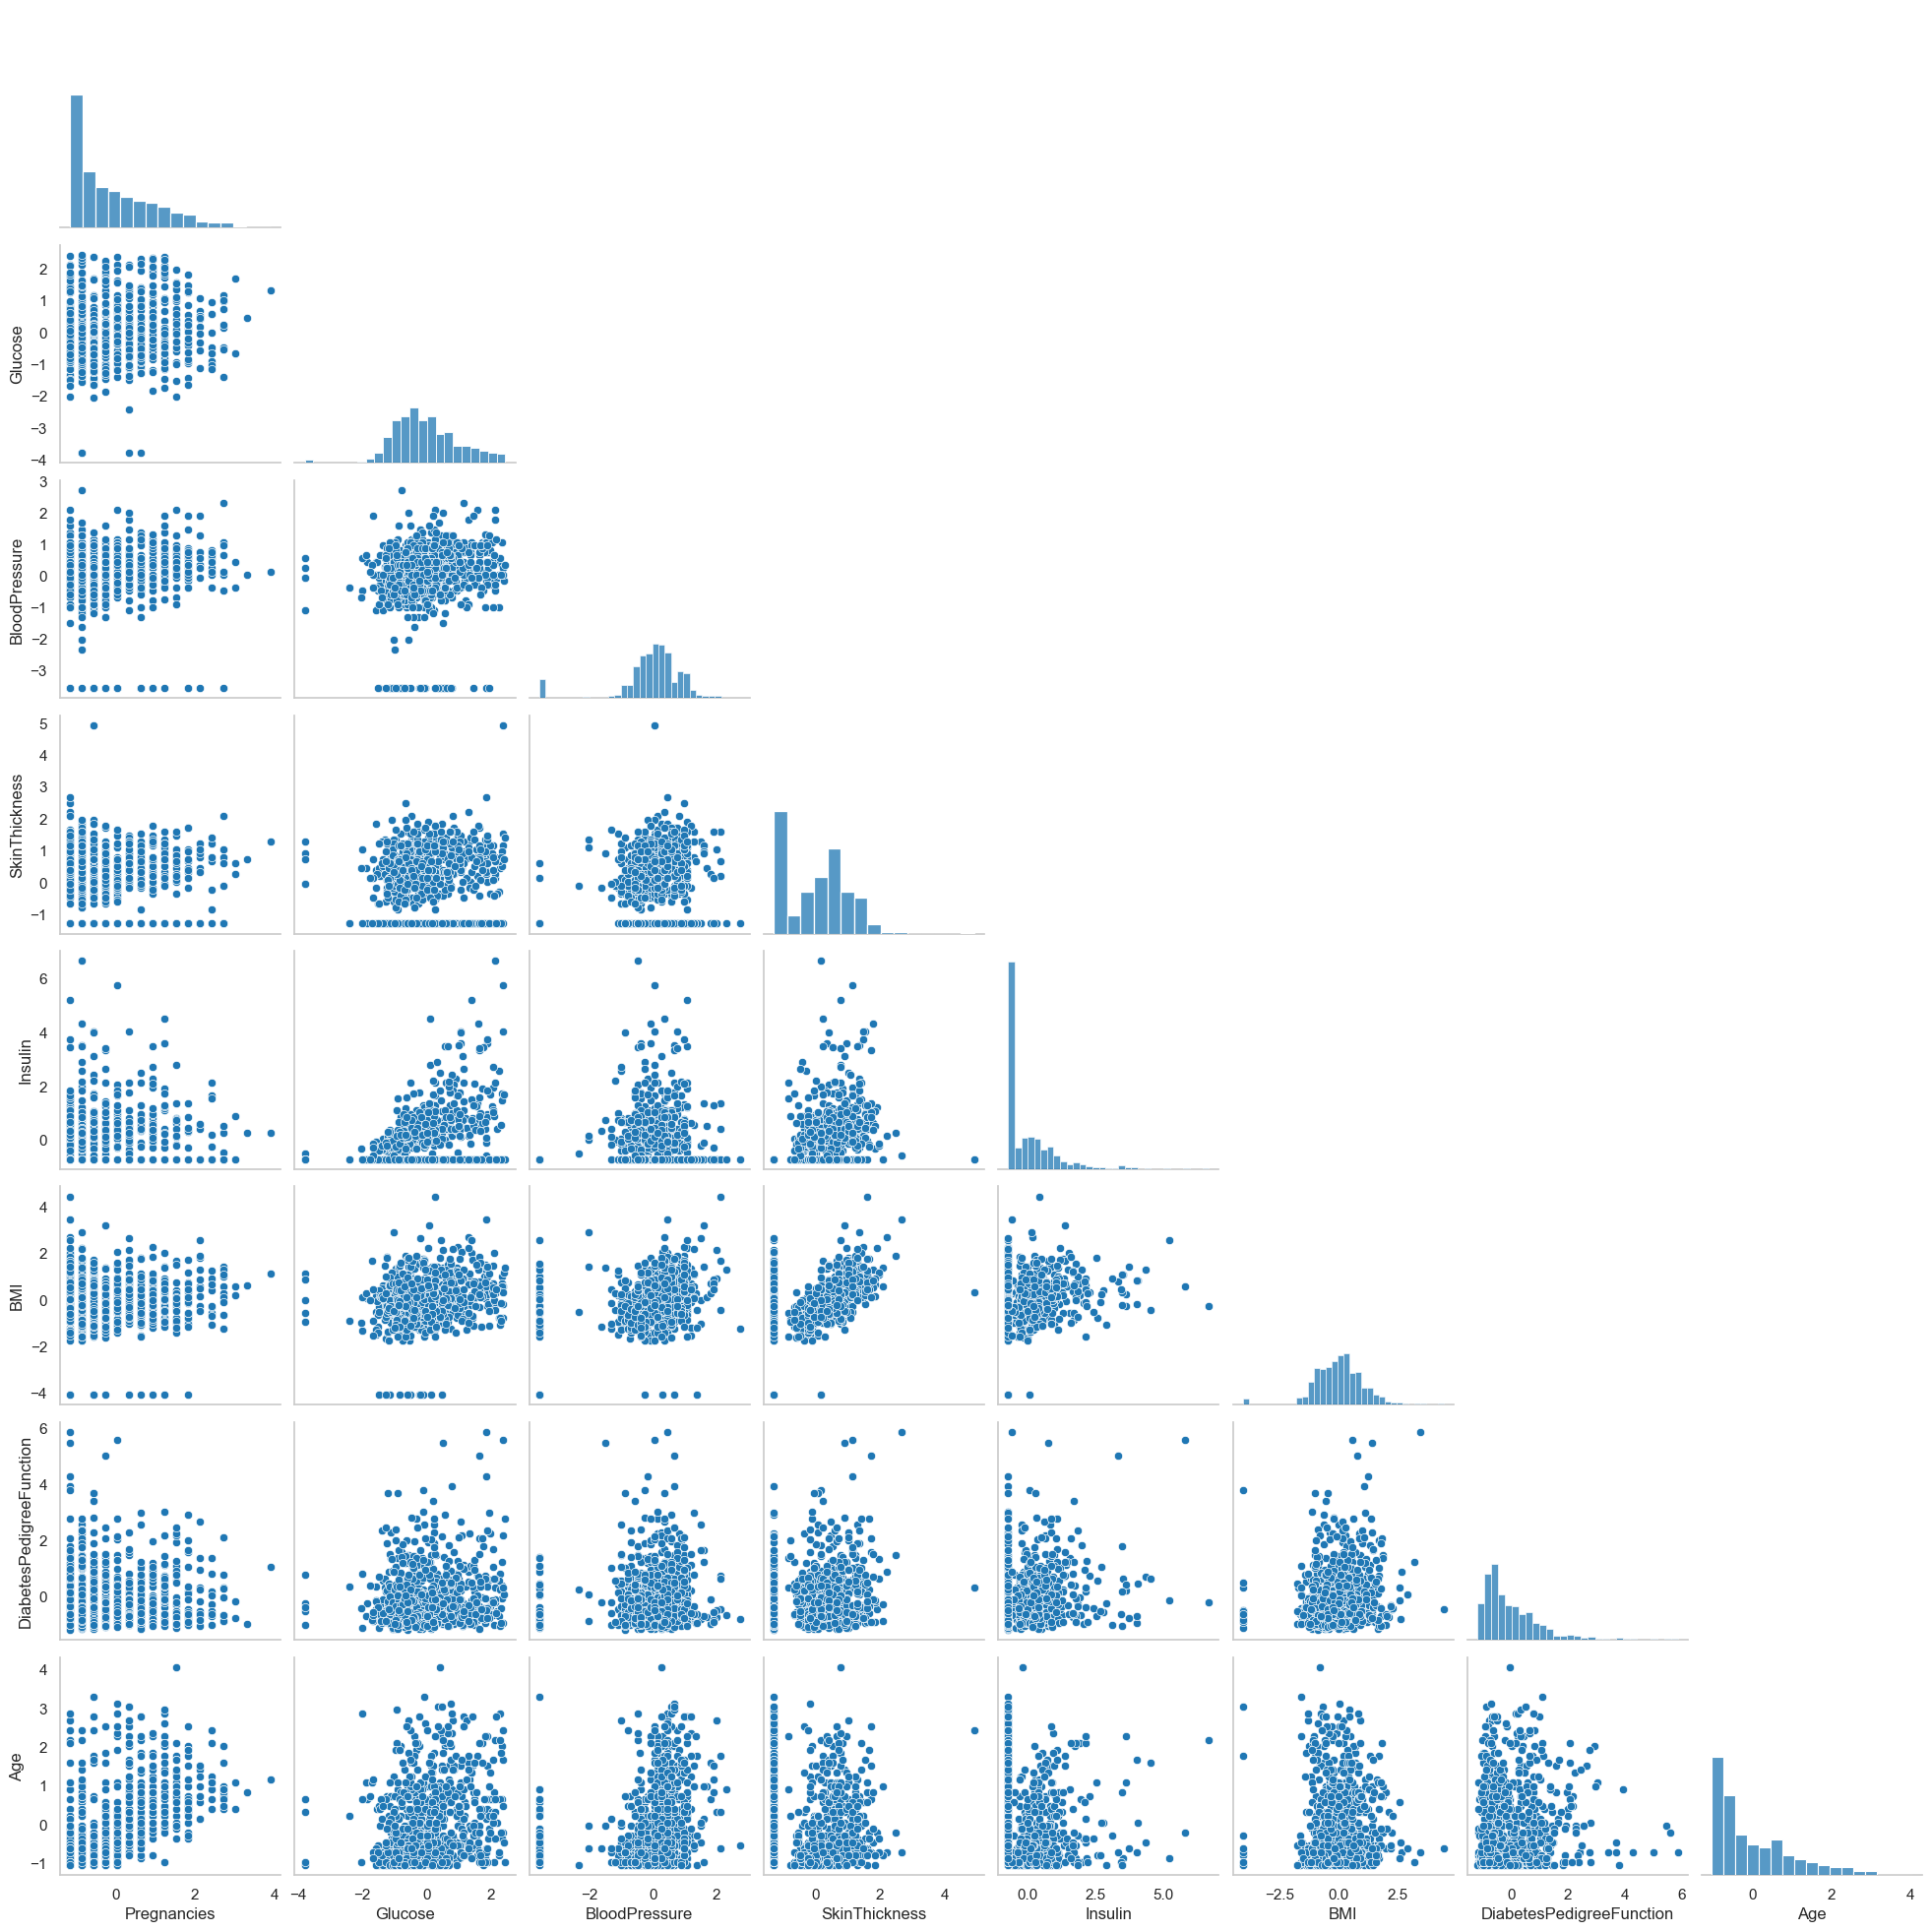

In [ ]:
sns.pairplot(df, corner = True)
plt.show()

<Axes: >

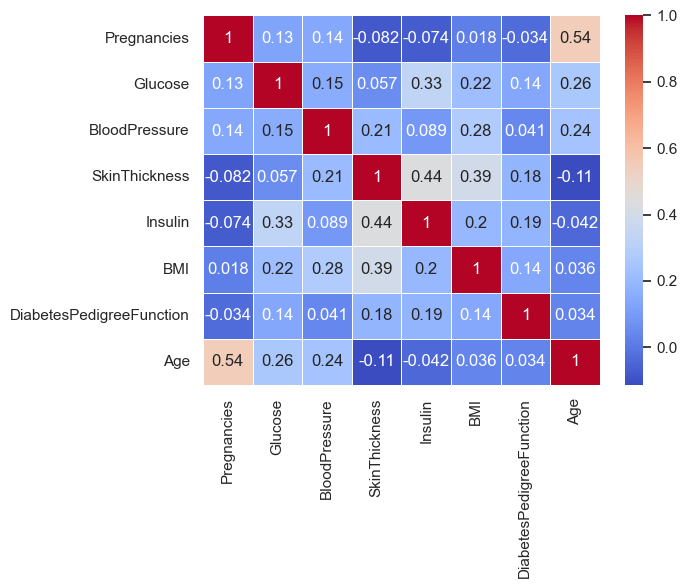

In [78]:
# Entender se há relação entre as variáveis
correlation_matrix = df.corr()

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5)

# As variáveis não apresentam alta correlação entre si, o que é bom em um algoritmo de distância

In [80]:
# Selecionar o número de variáveis que melhor explicam minha target seria interessante, visto que KNN é computacionalmente caro
# Posso testar o PCA para diminuir meu número de variáveis e entender a importância de cada uma através da variância
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(random_state = 42)
pca.fit(df)

for index, column in enumerate(df.columns):
    print(f'Variância explicada pela variável {column}: {pca.explained_variance_ratio_[index]}')


Variância explicada pela variável Pregnancies: 0.2617974931611006
Variância explicada pela variável Glucose: 0.21640126757746506
Variância explicada pela variável BloodPressure: 0.1287037336480191
Variância explicada pela variável SkinThickness: 0.10944113047600436
Variância explicada pela variável Insulin: 0.09529304819389635
Variância explicada pela variável BMI: 0.08532854849331163
Variância explicada pela variável DiabetesPedigreeFunction: 0.05247702246321912
Variância explicada pela variável Age: 0.05055775598698364


<p>O <b>método PCA</b> não avalia diretamente a importância das variáveis em relação à target, mas sim identifica as features com maior variância, partindo do pressuposto de que essas carregam mais informação sobre a variabilidade da target.</p> <p>O problema disso é que a variância pode ser maior em dados categóricos, como o número de filhos, que pode assumir diversos valores distintos dentro de um intervalo pequeno (geralmente de 1 a 8). <b>Isso pode gerar uma variância elevada, mas sem necessariamente indicar uma forte relação com a target.</b></p> <p>Um método mais adequado para medir diretamente a importância das variáveis em relação à target é o atributo <code>feature_importances_</code> do <code>DecisionTree/RandomForest</code>, que utiliza <b>Gini/Entropia (para classificação)</b> ou <b>MSE (para regressão)</b> para avaliar a impureza/variância da target em relação a cada variável.</p>

In [81]:
# Utilizarei Random Forest para diminuir o viés que pode ter em uma só árvore de decisão
from sklearn.ensemble import RandomForestClassifier

x = df
y = df_y

modelo = RandomForestClassifier(random_state = 42)
modelo.fit(x, y)

importances = pd.Series(modelo.feature_importances_, index= x.columns).sort_values(ascending=False)

df_importance = pd.DataFrame(data = importances, columns = ['Importância'])
df_importance.index.name = 'Features'
df_importance = df_importance.reset_index()

print(df_importance)

c:\Users\mrcsf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                   Features  Importância
0                   Glucose     0.267142
1                       BMI     0.168769
2                       Age     0.131567
3  DiabetesPedigreeFunction     0.122695
4             BloodPressure     0.088660
5               Pregnancies     0.085017
6                   Insulin     0.071547
7             SkinThickness     0.064604


<p>Essas ordem de importância das variáveis fazem muito mais sentido dado o problema</p>

Farei quatro versões de modelo, duas usando **KNeighborsClassifier**, e duas com **RadiusNeighborsClassifier**, e cada versão contará com duas propostas diferentes: que considera apenas as variáveis com **mais de 10% de importância**, e outra que considera todas as variáveis

In [82]:
#Pegando apenas colunas com maior importância

menor_que_10 = []

for i in range(len(df_importance)):
    if df_importance['Importância'][i] <= 0.10:
        menor_que_10.append(df_importance['Features'][i])

print(menor_que_10)

['BloodPressure', 'Pregnancies', 'Insulin', 'SkinThickness']


In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

In [84]:
#Aqui crio os dois grupos de conjunto de treino e teste

x_train_tudo, x_test_tudo, y_train_tudo, y_teste_tudo = train_test_split(x, y, test_size= 0.2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x.drop(columns=menor_que_10), y, test_size=0.2, random_state=42)

print(x_train)

      Glucose       BMI  DiabetesPedigreeFunction       Age
60  -1.154694 -4.060474                 -0.507006 -1.041549
618 -0.278373 -0.481351                  2.446670  1.425995
346  0.566649 -0.417892                  0.550035 -0.956462
294  1.255187 -1.280942                 -0.658012  2.702312
231  0.410164  1.803195                 -0.706334  1.085644
..        ...       ...                       ...       ...
71   0.566649 -0.430583                 -0.183854 -0.616111
106 -0.779128 -1.217483                 -0.799958 -0.531023
270 -0.622642  1.727044                  2.005732  0.404942
435  0.629244  1.320902                 -0.805998 -0.360847
102  0.128489 -1.204791                 -0.633851 -1.041549

[614 rows x 4 columns]


In [85]:
best_parametersKN = {
    "n_neighbors": range(1,15,2),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'p': [1, 2, 3],  # Só usado se metric='minkowski'
    "weights": ['uniform', 'distance']
} 

best_parametersRN = {
    "radius": np.arange(10.0, 80.0, 1.5),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'p': [1, 2, 3],  # Só usado se metric='minkowski'
    "weights": ['uniform', 'distance']
}

In [86]:
modelK = KNeighborsClassifier() 
modelR = RadiusNeighborsClassifier(outlier_label='most_frequent')

gridKn = GridSearchCV(modelK, param_grid = best_parametersKN, cv = 5, scoring="roc_auc", n_jobs = -1, verbose = 2 )
gridRn = GridSearchCV(modelR, param_grid = best_parametersRN, cv = 5, scoring="roc_auc", n_jobs = -1, verbose = 2)

In [93]:
#Radius e KNeighbor usando todas as features
gridKn.fit(x_train_tudo, y_train_tudo)
gridRn.fit(x_train_tudo, y_train_tudo)

melhoresKn = gridKn.best_params_
Knbestscore = gridKn.best_score_

melhoresRn = gridRn.best_params_
Rnbestscore = gridRn.best_score_

print(f'os melhores parâmetros para KNearestNeighbor: {melhoresKn} com melhor score: {Knbestscore} \nos melhores parâmetros para RadiusNeighbor: {melhoresRn} com melhor score: {Rnbestscore}')

y_pred_prob_KN = gridKn.predict_proba(x_test_tudo)[:, 1]
y_pred_prob_RN = gridRn.predict_proba(x_test_tudo)[:, 1]

Fitting 5 folds for each of 168 candidates, totalling 840 fits


c:\Users\mrcsf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Fitting 5 folds for each of 1128 candidates, totalling 5640 fits
os melhores parâmetros para KNearestNeighbor: {'metric': 'manhattan', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'} com melhor score: 0.8071619293712317 
os melhores parâmetros para RadiusNeighbor: {'metric': 'manhattan', 'p': 1, 'radius': 11.5, 'weights': 'distance'} com melhor score: 0.8259145441122184


c:\Users\mrcsf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._fit(X, y)


In [94]:
# Calculamos os pontos da Curva PR
precisionK, recallK, _ = precision_recall_curve(y_teste_tudo, y_pred_prob_KN)
precisionR, recallR, _ = precision_recall_curve(y_teste_tudo, y_pred_prob_RN)

# Calculamos a AUC-PR
auc_prKN = auc(recallK, precisionK)
auc_prRN = auc(recallR, precisionR)

print(f'PR de KNN: {auc_prKN} \nPR de Radius: {auc_prRN}')

PR de KNN: 0.648204156585755 
PR de Radius: 0.6940860690081357


In [95]:
#Radius e KNeighbor usando as features mais importantes
gridKn.fit(x_train, y_train)
gridRn.fit(x_train, y_train)

melhoresKn = gridKn.best_params_
Knbestscore = gridKn.best_score_

melhoresRn = gridRn.best_params_
Rnbestscore = gridRn.best_score_

print(f'os melhores parâmetros para KNearestNeighbor: {melhoresKn} com melhor score: {Knbestscore} \nos melhores parâmetros para RadiusNeighbor: {melhoresRn} com melhor score: {Rnbestscore}')

y_pred_prob_KN = gridKn.predict_proba(x_test)[:, 1]
y_pred_prob_RN = gridRn.predict_proba(x_test)[:, 1]

Fitting 5 folds for each of 168 candidates, totalling 840 fits


c:\Users\mrcsf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Fitting 5 folds for each of 1128 candidates, totalling 5640 fits
os melhores parâmetros para KNearestNeighbor: {'metric': 'manhattan', 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'} com melhor score: 0.8272290325116552 
os melhores parâmetros para RadiusNeighbor: {'metric': 'manhattan', 'p': 1, 'radius': 10.0, 'weights': 'distance'} com melhor score: 0.8403575530125919


c:\Users\mrcsf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._fit(X, y)


In [96]:
# Calculamos os pontos da Curva PR
precisionK, recallK, _ = precision_recall_curve(y_test, y_pred_prob_KN)
precisionR, recallR, _ = precision_recall_curve(y_test, y_pred_prob_RN)

# Calculamos a AUC-PR
auc_prKN = auc(recallK, precisionK)
auc_prRN = auc(recallR, precisionR)

print(f'PR de KNN: {auc_prKN} \nPR de Radius: {auc_prRN}')

PR de KNN: 0.6731107667133037 
PR de Radius: 0.6607695343530349


Como podemos ver, no geral, o modelo com apenas os dados mais importantes tem métricas melhores de avaliação, e dentre eles, o modelo que utiliza **raio ao invés de k vizinhos é o melhor**

## Como o KNN Mede as Distâncias e Quando Usar Cada Uma  

O K-Nearest Neighbors (KNN) mede a similaridade entre pontos com base em uma métrica de distância. A escolha da métrica afeta diretamente o desempenho do modelo e deve ser feita com base nas características dos dados.  

### **Principais Métricas de Distância no KNN**  

#### 1. Distância Euclidiana  
- **Fórmula:**  
  $$
  d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
  $$
- **Interpretação:** Mede a distância em linha reta entre dois pontos.  
- **Quando usar:** Se as features forem contínuas e possuírem escalas semelhantes.  

#### 2. Distância de Manhattan  
- **Fórmula:**  
  $$
  d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
  $$
- **Interpretação:** Mede a distância somando os deslocamentos horizontais e verticais.  
- **Quando usar:** Se os dados forem dispersos ou se houver restrições no deslocamento (como em mapas de cidades).  

#### 3. Distância de Minkowski  
- **Fórmula:**  
  $$
  d(x, y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
  $$
- **Interpretação:** Generaliza a distância Euclidiana (\(p=2\)) e Manhattan (\(p=1\)).  
- **Quando usar:** Se quiser testar diferentes pesos para penalizar as diferenças.   

#### 4. Distância de Mahalanobis  
- **Fórmula:**  
  $$
  d(x, y) = \sqrt{(x - y)^T S^{-1} (x - y)}
  $$
  Onde \(S\) é a matriz de covariância das variáveis.  
- **Interpretação:** Considera a correlação entre variáveis e ajusta as distâncias conforme a dispersão dos dados.  
- **Quando usar:** Se os dados tiverem correlação significativa entre as features.  